# Demo
------
Live demo from research meeting 2022-3-20

## Imports

In [2]:
import numpy as np
from lightning import Lightning

import matplotlib.pyplot as plt

plt.style.use('ebm-dejavu') # Comment me out if running locally

%matplotlib inline

## Define Lightning object
All that is required is a set of filters (same labels as IDL Lightning) and a redshift.

In [8]:
filter_labels = ['SDSS_u', 'SDSS_g', 'SDSS_r', 'SDSS_i', 'SDSS_z', 'NIRCam_F444W']

l = Lightning(filter_labels, 0.0, dust_emission=True, print_setup_time=True)

0.106 s elapsed in _get_filters
0.001 s elapsed in _get_wave_obs
1.243 s elapsed in stellar model setup
0.000 s elapsed in dust attenuation model setup
2.479 s elapsed in dust emission model setup
3.830 s elapsed total


The Lightning object knows what its model components and parameters are:

In [14]:
l.print_params(verbose=True)


Piecewise-Constant
Parameter Bounds [2]       Description       
--------- ---------- ------------------------
    psi_1 0.0 .. inf SFR in stellar age bin 1
    psi_2 0.0 .. inf SFR in stellar age bin 2
    psi_3 0.0 .. inf SFR in stellar age bin 3
    psi_4 0.0 .. inf SFR in stellar age bin 4
    psi_5 0.0 .. inf SFR in stellar age bin 5

Modified-Calzetti
   Parameter    ...                       Description                       
--------------- ... --------------------------------------------------------
mcalz_tauV_diff ...                         Optical depth of the diffuse ISM
    mcalz_delta ...      Deviation from the Calzetti+2000 UV power law slope
  mcalz_tauV_BC ... Optical depth of the birth cloud in star forming regions

DL07-Dust
   Parameter    ...
--------------- ...
dl07_dust_alpha ...
dl07_dust_U_min ...
dl07_dust_U_max ...
dl07_dust_gamma ...
dl07_dust_q_PAH ...

Total parameters: 13


## Evaluate the model

At present, the Lightning object (and every model object) has two methods, `get_model_lnu` and `get_model_lnu_hires` that produce the model $L_\nu$ convolved with the filters and at full resolution, respectively.

In [12]:
params = np.array([1,1,1,1,1,
                   0.3, 0, 0,
                   2, 1, 3e5, 0.01, 0.025])

lnu_lores_red, lnu_lores_unred = l.get_model_lnu(params, stepwise=False)
lnu_hires_red, lnu_hires_unred = l.get_model_lnu_hires(params, stepwise=False)

Text(0, 0.5, '$\\nu L_{\\nu}\\ [\\rm L_{\\odot}]$')

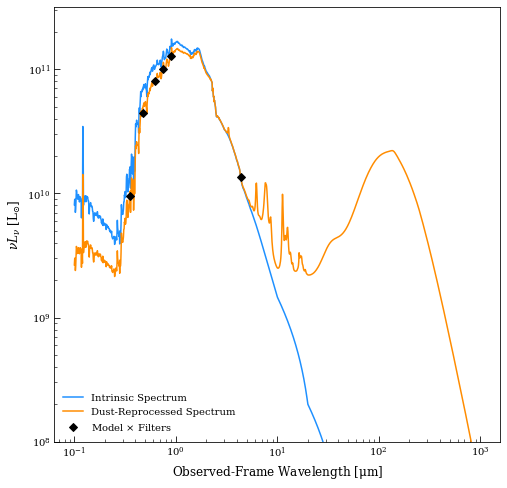

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(l.wave_grid_obs, l.nu_grid_obs * lnu_hires_unred, color='dodgerblue', label='Intrinsic Spectrum')
ax.plot(l.wave_grid_obs, l.nu_grid_obs * lnu_hires_red, color='darkorange', label='Dust-Reprocessed Spectrum')

ax.plot(l.wave_obs, l.nu_obs * lnu_lores_red, color='k', markerfacecolor='k', marker='D', linestyle='', label=r'Model $\times$ Filters')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e8,)
ax.legend(loc='lower left')

ax.set_xlabel(r'Observed-Frame Wavelength [$\rm \mu m$]')
ax.set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')